In [1]:
# import pandas as pd

# # Load dataset
# df = pd.read_csv('/kaggle/input/final-news/News Dataset.csv')


In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\User\\Desktop\\Summer'24\\Research 498R\\Dataset\\News Dataset.csv")


# EDA

In [2]:
# Get dataset info
df.info()

# Check the shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for any missing values
df.isnull().sum()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39142 entries, 0 to 39141
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  39142 non-null  object
 1   summary   39142 non-null  object
 2   article   39142 non-null  object
dtypes: object(3)
memory usage: 917.5+ KB
Dataset contains 39142 rows and 3 columns.


,headline,summary,article
count,39142,39142,39142
unique,38858,39091,39138
top,আজ টিভির পর্দায় দেখবেন যেসব খেলা,প্রতিদিনই দর্শকদের জন্য নতুন সিনেমা এবং ওয়েব স...,
freq,33,7,2


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# If any column has a large number of missing values, investigate further


Missing values per column:
 headline    0
summary     0
article     0
dtype: int64


In [4]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Optionally remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 1


In [5]:
import pandas as pd

# Calculate the length of each article and summary in terms of words
df['article_length'] = df['article'].apply(lambda x: len(x.split()))
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))

# Find maximum and minimum lengths for articles and summaries
max_article_word_length = df['article_length'].max()
min_article_word_length = df['article_length'].min()
max_summary_word_length = df['summary_length'].max()
min_summary_word_length = df['summary_length'].min()

# Print the results
print(f"Max article length (words): {max_article_word_length}")
print(f"Min article length (words): {min_article_word_length}")
print(f"Max summary length (words): {max_summary_word_length}")
print(f"Min summary length (words): {min_summary_word_length}")


Max article length (words): 5373
Min article length (words): 0
Max summary length (words): 1154
Min summary length (words): 0


In [6]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_length(data, title):
    
    # Set up the figure and axes
    plt.figure(figsize=(14, 6))
    
    # Custom font properties for better aesthetics
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')
    
    # Plot histogram for article text length
    plt.subplot(1, 2, 1)
    plt.hist(data['article_length'], bins=40, color='cornflowerblue', edgecolor='black', alpha=0.7)
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Bangla News Article Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title('Article Length Distribution', fontsize=12, fontproperties=custom_font, color='black')
    
    # Plot histogram for summary text length
    plt.subplot(1, 2, 2)
    plt.hist(data['summary_length'], bins=40, color='firebrick', edgecolor='black', alpha=0.7)
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("News Summary Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title('Summary Length Distribution', fontsize=12, fontproperties=custom_font, color='black')
    
    # Set the main title and adjust layout
    plt.suptitle(f'Text Length Distribution for {title}', fontsize=14, fontproperties=custom_font, color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
    
    # Show the plot
    plt.show()


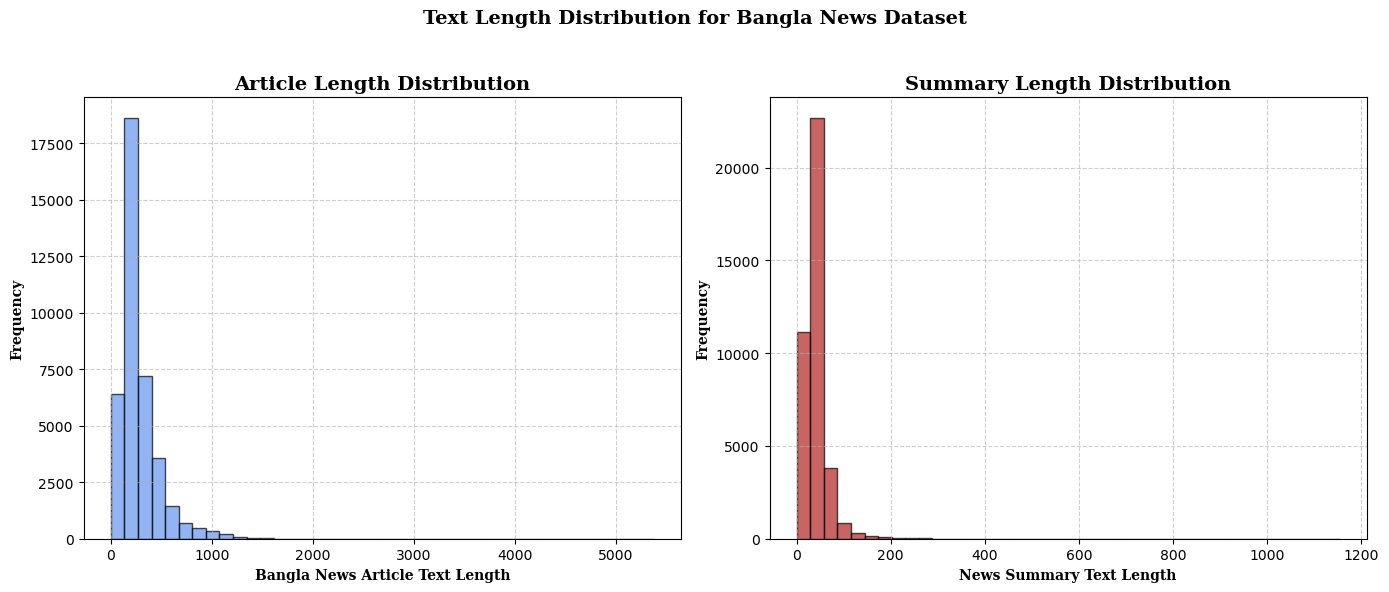

In [7]:
visualize_text_length(df, "Bangla News Dataset")


In [10]:
# import matplotlib.pyplot as plt

# # Plot histogram for article word lengths
# plt.figure(figsize=(12, 6))
# plt.hist(df['article_word_length'], bins=50, color='blue', edgecolor='black')
# plt.title('Distribution of Article Word Lengths')
# plt.xlabel('Word Length (words)')
# plt.ylabel('Frequency')
# plt.show()

# # Plot histogram for summary word lengths
# plt.figure(figsize=(12, 6))
# plt.hist(df['summary_word_length'], bins=50, color='green', edgecolor='black')
# plt.title('Distribution of Summary Word Lengths')
# plt.xlabel('Word Length (words)')
# plt.ylabel('Frequency')
# plt.show()


c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


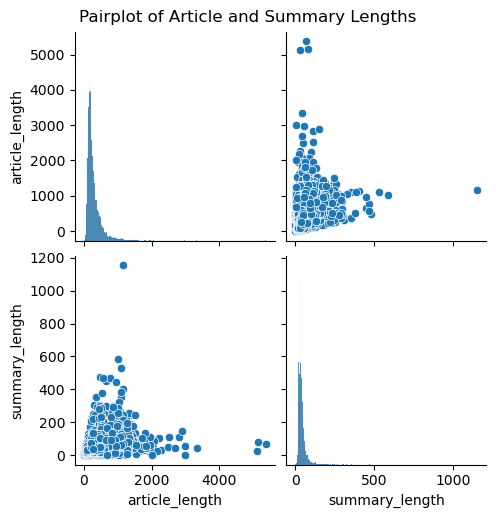

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to explore relationships between article and summary lengths
sns.pairplot(df[['article_length', 'summary_length']])
plt.suptitle('Pairplot of Article and Summary Lengths', y=1.02)
plt.show()


       article_length  summary_length
count    39141.000000    39141.000000
mean       279.283973       40.815360
std        204.464585       24.939879
min          0.000000        0.000000
25%        156.000000       27.000000
50%        218.000000       36.000000
75%        335.000000       47.000000
max       5373.000000     1154.000000


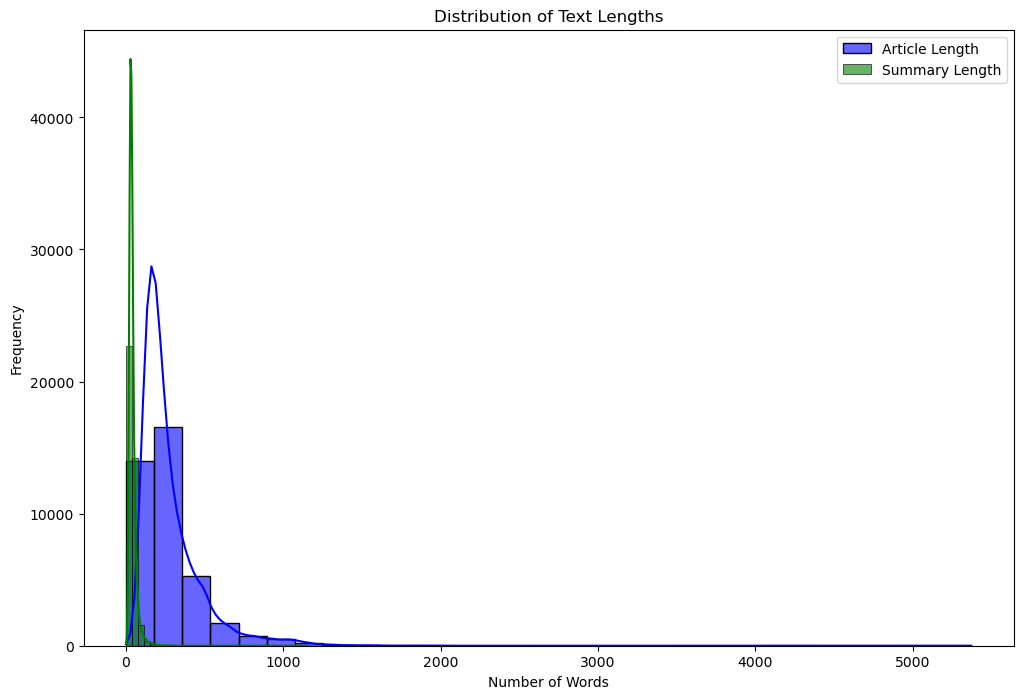

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Describe the text lengths
print(df[['article_length', 'summary_length']].describe())

# Visualize text length distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['article_length'], bins=30, color='blue', kde=True, label='Article Length', alpha=0.6)
sns.histplot(df['summary_length'], bins=30, color='green', kde=True, label='Summary Length', alpha=0.6)
# sns.histplot(df['headline_length'], bins=30, color='red', kde=True, label='Headline Length', alpha=0.6)
plt.legend()
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Outliers based on Z-score for articles:
       article_length
count      863.000000
mean      1130.011587
std        358.080585
min        893.000000
25%        968.500000
50%       1047.000000
75%       1159.500000
max       5373.000000
Outliers based on Z-score for summaries:
       summary_length
count      663.000000
mean       163.235294
std         68.404622
min        116.000000
25%        126.500000
50%        144.000000
75%        175.000000
max       1154.000000
Outliers based on IQR for articles:
       article_length
count     2492.000000
mean       860.648475
std        295.429647
min        604.000000
25%        672.000000
50%        789.000000
75%        976.000000
max       5373.000000
Outliers based on IQR for summaries:
       summary_length
count     2123.000000
mean       113.801225
std         51.429298
min         78.000000
25%         85.000000
50%         98.000000
75%        124.000000
max       1154.000000


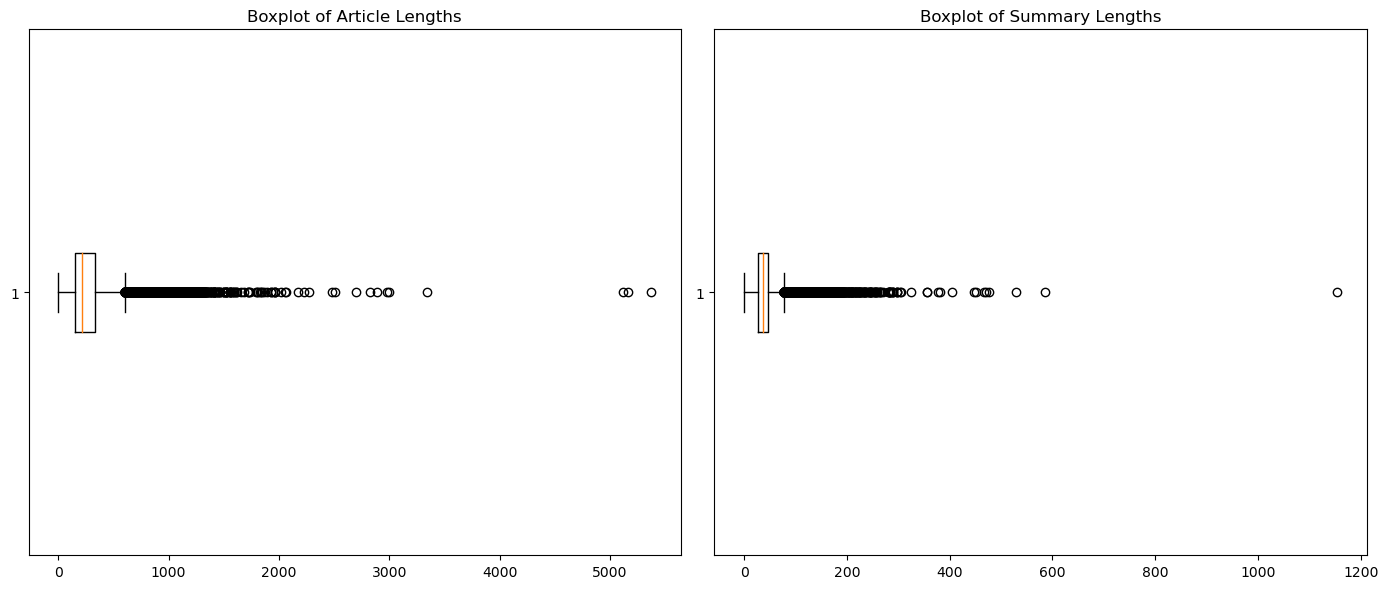

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv')

# Calculate basic statistics
stats = {
    'article_words': {
        'mean': df['article_length'].mean(),
        'std': df['article_length'].std(),
        'q1': df['article_length'].quantile(0.25),
        'q3': df['article_length'].quantile(0.75)
    },
    'summary_words': {
        'mean': df['summary_length'].mean(),
        'std': df['summary_length'].std(),
        'q1': df['summary_length'].quantile(0.25),
        'q3': df['summary_length'].quantile(0.75)
    }
}

# Define outlier thresholds using Z-score
def detect_outliers_z(df, column, threshold=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = (df[column] - mean) / std_dev
    return df[np.abs(z_scores) > threshold]

# Define outlier thresholds using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

# Identify outliers
outliers_article_z = detect_outliers_z(df, 'article_length')
outliers_summary_z = detect_outliers_z(df, 'summary_length')
outliers_article_iqr = detect_outliers_iqr(df, 'article_length')
outliers_summary_iqr = detect_outliers_iqr(df, 'summary_length')

# Print outliers statistics
print("Outliers based on Z-score for articles:")
print(outliers_article_z[['article_length']].describe())

print("Outliers based on Z-score for summaries:")
print(outliers_summary_z[['summary_length']].describe())

print("Outliers based on IQR for articles:")
print(outliers_article_iqr[['article_length']].describe())

print("Outliers based on IQR for summaries:")
print(outliers_summary_iqr[['summary_length']].describe())

# Visualization: Boxplots for article and summary lengths
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['article_length'], vert=False)
plt.title('Boxplot of Article Lengths')

plt.subplot(1, 2, 2)
plt.boxplot(df['summary_length'], vert=False)
plt.title('Boxplot of Summary Lengths')

plt.tight_layout()
plt.show()


In [11]:
df

,headline,summary,article,article_length,summary_length
0,তুরস্কে সুইডেনের দূতাবাসে হামলা,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,82,22
1,ডেঙ্গুতে আক্রান্তদের চিকিৎসার দায়িত্ব নিলেন সা...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,347,68
2,সুনামগঞ্জে আওয়ামী লীগের উদ্যোগে রক্তদান কর্মসূচি,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,159,16
3,সরকারবিরোধী ষড়যন্ত্র করে লাভ হবে না: পানিসম্পদ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,149,42
4,নতুন কর্মসূচি ঘোষণা করলো ১৪ দল,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,121,33
...,...,...,...,...,...
39137,ভাইকে বলেছিলাম আমি একুশে পদক নিবো না!,"আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...","আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...",213,48
39138,সাদি মহম্মদের একটা বড় দুঃখ ছিল!,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,796,94
39139,দেশে কর্মজীবী শিশুর সংখ্যা ৩৫ লাখ,দেশে শিশুশ্রম বেড়েছে। বাংলাদেশ পরিসংখ্যান ব্যু...,দেশে শিশুশ্রম বেড়েছে। বাংলাদেশ পরিসংখ্যান ব্যু...,217,76
39140,ব্রাহ্মণবাড়িয়ায় ১২০ টাকায় পুলিশে চাকরি পেলো ৭১ জন,‘সেবার ব্রতে চাকরি’ এই শ্লোগানে শতভাগ মেধা-যোগ...,‘সেবার ব্রতে চাকরি’ এই শ্লোগানে শতভাগ মেধা-যোগ...,259,37


# Data Split

In [17]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df, test_size=0.30, shuffle=True)
# df_val, df_test = train_test_split(df_test, test_size=0.65,shuffle=True)

In [18]:
# # Print the length of each DataFrame
# print(f"Training set length: {len(df_train)}")
# print(f"Validation set length: {len(df_val)}")
# print(f"Test set length: {len(df_test)}")

# Preprocessing

In [12]:
df

,headline,summary,article,article_length,summary_length
0,তুরস্কে সুইডেনের দূতাবাসে হামলা,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,82,22
1,ডেঙ্গুতে আক্রান্তদের চিকিৎসার দায়িত্ব নিলেন সা...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,347,68
2,সুনামগঞ্জে আওয়ামী লীগের উদ্যোগে রক্তদান কর্মসূচি,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,159,16
3,সরকারবিরোধী ষড়যন্ত্র করে লাভ হবে না: পানিসম্পদ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,149,42
4,নতুন কর্মসূচি ঘোষণা করলো ১৪ দল,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,121,33
...,...,...,...,...,...
39137,ভাইকে বলেছিলাম আমি একুশে পদক নিবো না!,"আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...","আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...",213,48
39138,সাদি মহম্মদের একটা বড় দুঃখ ছিল!,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,796,94
39139,দেশে কর্মজীবী শিশুর সংখ্যা ৩৫ লাখ,দেশে শিশুশ্রম বেড়েছে। বাংলাদেশ পরিসংখ্যান ব্যু...,দেশে শিশুশ্রম বেড়েছে। বাংলাদেশ পরিসংখ্যান ব্যু...,217,76
39140,ব্রাহ্মণবাড়িয়ায় ১২০ টাকায় পুলিশে চাকরি পেলো ৭১ জন,‘সেবার ব্রতে চাকরি’ এই শ্লোগানে শতভাগ মেধা-যোগ...,‘সেবার ব্রতে চাকরি’ এই শ্লোগানে শতভাগ মেধা-যোগ...,259,37


In [13]:
# Check for missing values
df.isnull().sum()

# Option 1: Drop rows with missing values
df = df.dropna()

# Option 2: Fill missing values (if possible)
df['article'].fillna('', inplace=True)


In [14]:
import re

def clean_text(text):
    # Emoji removal pattern covering various emoji ranges
    emoji_pattern = re.compile("[" 
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Misc Symbols and Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport and Map
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # Enclosed Characters
                               "]+", flags=re.UNICODE)

    # Remove emojis
    text = emoji_pattern.sub(r'', text)

    # Punctuation to remove, but keeping numbers (both English and Bengali numerals)
    punctuations = '''`|¢|Ñ+-*/=EROero৳!()-[]{};:'"“’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    # Create a regex pattern to remove punctuation and special characters except numbers
    regex_pattern = '[' + re.escape(punctuations) + ']'
    text = re.sub(regex_pattern, '', text)

    # Remove non-Bangla characters except Bengali and English numerals
    text = re.sub(r'[^অ-হা়-ুৃ-ৄেৈ-োৌ্ক্ৎড়ঢ়য়০-৯0-9]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [15]:
# Apply cleaning function to articles and summaries
df['clean_article'] = df['article'].apply(clean_text)
df['clean_summary'] = df['summary'].apply(clean_text)

In [25]:
df

,headline,summary,article,article_length,summary_length,clean_article,clean_summary
0,তুরস্কে সুইডেনের দূতাবাসে হামলা,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,82,22,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...
1,ডেঙ্গুতে আক্রান্তদের চিকিৎসার দায়িত্ব নিলেন সা...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,347,68,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ র ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ র ...
2,সুনামগঞ্জে আওয়ামী লীগের উদ্যোগে রক্তদান কর্মসূচি,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,159,16,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...
3,সরকারবিরোধী ষড়যন্ত্র করে লাভ হবে না: পানিসম্পদ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,149,42,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...
4,নতুন কর্মসূচি ঘোষণা করলো ১৪ দল,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,121,33,বিএনপির অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রতিব...,বিএনপির অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রতিব...
...,...,...,...,...,...,...,...
39137,ভাইকে বলেছিলাম আমি একুশে পদক নিবো না!,"আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...","আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...",213,48,আমার ভাই মনে কষ্ট নিয়ে চলে গেছে সে মনে করত তাক...,আমার ভাই মনে কষ্ট নিয়ে চলে গেছে সে মনে করত তাক...
39138,সাদি মহম্মদের একটা বড় দুঃখ ছিল!,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,796,94,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...,সারাজীবন আমি ভেবেছি সাদি আর শিবলী আমরা প্রায় স...
39139,দেশে কর্মজীবী শিশুর সংখ্যা ৩৫ লাখ,দেশে শিশুশ্রম বেড়েছে। বাংলাদেশ পরিসংখ্যান ব্যু...,দেশে শিশুশ্রম বেড়েছে। বাংলাদেশ পরিসংখ্যান ব্যু...,217,76,দেশে শিশুশ্রম বেড়েছে বা লাদেশ পরিস খ্যান ব্যুর...,দেশে শিশুশ্রম বেড়েছে বা লাদেশ পরিস খ্যান ব্যুর...
39140,ব্রাহ্মণবাড়িয়ায় ১২০ টাকায় পুলিশে চাকরি পেলো ৭১ জন,‘সেবার ব্রতে চাকরি’ এই শ্লোগানে শতভাগ মেধা-যোগ...,‘সেবার ব্রতে চাকরি’ এই শ্লোগানে শতভাগ মেধা-যোগ...,259,37,সেবার ব্রতে চাকরি এই শ্লোগানে শতভাগ মেধাযোগ্যত...,সেবার ব্রতে চাকরি এই শ্লোগানে শতভাগ মেধাযোগ্যত...


In [16]:
# Drop rows where the article length is greater than 1000 and summary length is greater than 200
df_cleaned = df[(df['article_length'] <= 600) & (df['summary_length'] <= 75)]

# Check the shape of the DataFrame after removing the rows
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


Original DataFrame shape: (39141, 7)
Cleaned DataFrame shape: (35116, 7)


In [17]:
df_cleaned

,headline,summary,article,article_length,summary_length,clean_article,clean_summary
0,তুরস্কে সুইডেনের দূতাবাসে হামলা,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,82,22,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...
1,ডেঙ্গুতে আক্রান্তদের চিকিৎসার দায়িত্ব নিলেন সা...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,347,68,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ র ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ র ...
2,সুনামগঞ্জে আওয়ামী লীগের উদ্যোগে রক্তদান কর্মসূচি,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,159,16,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...
3,সরকারবিরোধী ষড়যন্ত্র করে লাভ হবে না: পানিসম্পদ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,149,42,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...
4,নতুন কর্মসূচি ঘোষণা করলো ১৪ দল,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,121,33,বিএনপির অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রতিব...,বিএনপির অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রতিব...
...,...,...,...,...,...,...,...
39126,"রাশিয়ায় প্রেসিডেন্ট নির্বাচন আজ, সবাইকে ভোট দে...",রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...,রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...,460,40,রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...,রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...
39128,সিলেটের ঐতিহ্য ‘পুড়ির বাড়ি ইফতারি’,রমজান মাসে সিলেট অঞ্চলে ‘পুড়ির (মেয়ে) বাড়ি ইফত...,রমজান মাসে সিলেট অঞ্চলে ‘পুড়ির (মেয়ে) বাড়ি ইফত...,512,47,রমজান মাসে সিলেট অঞ্চলে পুড়ির মেয়ে বাড়ি ইফতারি...,রমজান মাসে সিলেট অঞ্চলে পুড়ির মেয়ে বাড়ি ইফতারি...
39136,শিশুপ্রেমী বঙ্গবন্ধু,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নাম—যে না...,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নাম—যে না...,464,47,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নামযে নাম...,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নামযে নাম...
39137,ভাইকে বলেছিলাম আমি একুশে পদক নিবো না!,"আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...","আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...",213,48,আমার ভাই মনে কষ্ট নিয়ে চলে গেছে সে মনে করত তাক...,আমার ভাই মনে কষ্ট নিয়ে চলে গেছে সে মনে করত তাক...


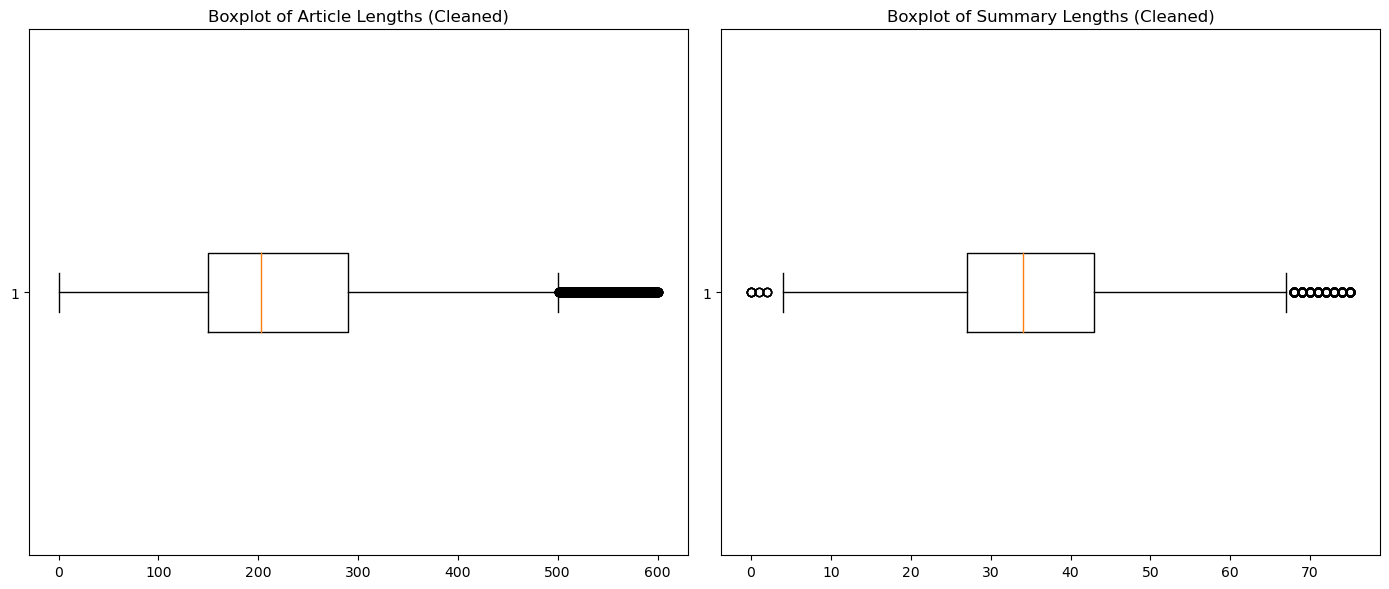

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Boxplots for article and summary lengths in the cleaned DataFrame
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned['article_length'], vert=False)
plt.title('Boxplot of Article Lengths (Cleaned)')

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['summary_length'], vert=False)
plt.title('Boxplot of Summary Lengths (Cleaned)')

plt.tight_layout()
plt.show()


In [21]:
# df_cleaned.to_csv(r'C:\Users\User\Desktop\preprocessed_bangla_news.csv', index=False)

In [19]:
df_cleaned

,headline,summary,article,article_length,summary_length,clean_article,clean_summary
0,তুরস্কে সুইডেনের দূতাবাসে হামলা,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,82,22,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...,তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...
1,ডেঙ্গুতে আক্রান্তদের চিকিৎসার দায়িত্ব নিলেন সা...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...,347,68,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ র ...,সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ র ...
2,সুনামগঞ্জে আওয়ামী লীগের উদ্যোগে রক্তদান কর্মসূচি,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,159,16,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...,শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...
3,সরকারবিরোধী ষড়যন্ত্র করে লাভ হবে না: পানিসম্পদ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,149,42,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...,পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...
4,নতুন কর্মসূচি ঘোষণা করলো ১৪ দল,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...,121,33,বিএনপির অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রতিব...,বিএনপির অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রতিব...
...,...,...,...,...,...,...,...
39126,"রাশিয়ায় প্রেসিডেন্ট নির্বাচন আজ, সবাইকে ভোট দে...",রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...,রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...,460,40,রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...,রাশিয়ায় প্রেসিডেন্ট নির্বাচনের জন্য দেশব্যাপী ...
39128,সিলেটের ঐতিহ্য ‘পুড়ির বাড়ি ইফতারি’,রমজান মাসে সিলেট অঞ্চলে ‘পুড়ির (মেয়ে) বাড়ি ইফত...,রমজান মাসে সিলেট অঞ্চলে ‘পুড়ির (মেয়ে) বাড়ি ইফত...,512,47,রমজান মাসে সিলেট অঞ্চলে পুড়ির মেয়ে বাড়ি ইফতারি...,রমজান মাসে সিলেট অঞ্চলে পুড়ির মেয়ে বাড়ি ইফতারি...
39136,শিশুপ্রেমী বঙ্গবন্ধু,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নাম—যে না...,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নাম—যে না...,464,47,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নামযে নাম...,বঙ্গবন্ধু শেখ মুজিবুর রহমান এমন একটি নামযে নাম...
39137,ভাইকে বলেছিলাম আমি একুশে পদক নিবো না!,"আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...","আমার ভাই মনে কষ্ট নিয়ে চলে গেছে। সে মনে করত, ত...",213,48,আমার ভাই মনে কষ্ট নিয়ে চলে গেছে সে মনে করত তাক...,আমার ভাই মনে কষ্ট নিয়ে চলে গেছে সে মনে করত তাক...
